In [25]:
import numpy as np
import pandas as pd
from joblib import load
import matplotlib.pyplot as plt
from cycler import cycler
from event_types import event_types

In [32]:
def plot_variable_importance(trained_model, regressor_name, energy_bin, train_features):
    '''
    Plot the importance of the variables for the provided trained_model in the 'energy_bin'.
    Parameters
    ----------
    trained_model: a trained sklearn regressor for one energy range
    regressor_name: str
        The regressor name (as defined in define_regressors())
    energy_bin: str
        The energy bin for this model (as defined in bin_data_in_energy())
    train_features: list
        List of variable names trained with.
    Returns
    -------
    A pyplot instance with the importances plot.
    '''

    if hasattr(trained_model, 'feature_importances_'):

        importances = trained_model.feature_importances_
        dtf_importances = pd.DataFrame({'importance': importances, 'variable': train_features})
        dtf_importances.sort_values('importance', ascending=False)
        dtf_importances['cumsum'] = dtf_importances['importance'].cumsum(axis=0)
        dtf_importances = dtf_importances.set_index('variable')

        fig, ax = plt.subplots(nrows=1, ncols=2, sharex=False, sharey=False, figsize=[16, 10])
        fig.suptitle('Features Importance for {}\n{}'.format(
                regressor_name,
                this_e_range
            ),
            fontsize=20
        )
        ax[0].title.set_text('variables')
        dtf_importances[['importance']].sort_values(by='importance').plot(
            kind='barh',
            legend=False,
            ax=ax[0]
        ).grid(axis='x')
        ax[0].set(ylabel='')
        ax[1].title.set_text('cumulative')
        dtf_importances[['cumsum']].plot(
            kind='line',
            linewidth=4,
            legend=False,
            ax=ax[1]
        )
        ax[1].set(
            xlabel='',
            xticks=np.arange(len(dtf_importances)),
            xticklabels=dtf_importances.index
        )
        plt.xticks(rotation=70)
        plt.grid(axis='both')
        
        return plt
    else:
        print('Warning: importances cannot be calculated for the {} model'.format(regressor_name))
        return None



In [11]:
def setStyle(palette='default', bigPlot=False):
    '''
    A function to set the plotting style.
    The function receives the colour palette name and whether it is
    a big plot or not. The latter sets the fonts and marker to be bigger in case it is a big plot.
    The available colour palettes are as follows:

    - classic (default): A classic colourful palette with strong colours and contrast.
    - modified classic: Similar to the classic, with slightly different colours.
    - autumn: A slightly darker autumn style colour palette.
    - purples: A pseudo sequential purple colour palette (not great for contrast).
    - greens: A pseudo sequential green colour palette (not great for contrast).

    To use the function, simply call it before plotting anything.

    Parameters
    ----------
    palette: str
    bigPlot: bool

    Raises
    ------
    KeyError if provided palette does not exist.
    '''

    COLORS = dict()
    COLORS['classic'] = ['#ba2c54', '#5B90DC', '#FFAB44', '#0C9FB3', '#57271B', '#3B507D',
                         '#794D88', '#FD6989', '#8A978E', '#3B507D', '#D8153C', '#cc9214']
    COLORS['modified classic'] = ['#D6088F', '#424D9C', '#178084', '#AF99DA', '#F58D46', '#634B5B',
                                  '#0C9FB3', '#7C438A', '#328cd6', '#8D0F25', '#8A978E', '#ffcb3d']
    COLORS['autumn'] = ['#A9434D', '#4E615D', '#3C8DAB', '#A4657A', '#424D9C', '#DC575A',
                        '#1D2D38', '#634B5B', '#56276D', '#577580', '#134663', '#196096']
    COLORS['purples'] = ['#a57bb7', '#343D80', '#EA60BF', '#B7308E', '#E099C3', '#7C438A',
                         '#AF99DA', '#4D428E', '#56276D', '#CC4B93', '#DC4E76', '#5C4AE4']
    COLORS['greens'] = ['#268F92', '#abc14d', '#8A978E', '#0C9FB3', '#BDA962', '#B0CB9E',
                        '#769168', '#5E93A5', '#178084', '#B7BBAD', '#163317', '#76A63F']

    COLORS['default'] = COLORS['classic']

    MARKERS = ['o', 's', 'v', '^', '*', 'P', 'd', 'X', 'p', '<', '>', 'h']
    LINES = [(0, ()),  # solid
             (0, (1, 1)),  # densely dotted
             (0, (3, 1, 1, 1)),  # densely dashdotted
             (0, (5, 5)),  # dashed
             (0, (3, 1, 1, 1, 1, 1)),  # densely dashdotdotted
             (0, (5, 1)),  # desnely dashed
             (0, (1, 5)),  # dotted
             (0, (3, 5, 1, 5)),  # dashdotted
             (0, (3, 5, 1, 5, 1, 5)),  # dashdotdotted
             (0, (5, 10)),  # loosely dashed
             (0, (1, 10)),  # loosely dotted
             (0, (3, 10, 1, 10)),  # loosely dashdotted
             ]

    if palette not in COLORS.keys():
        raise KeyError('palette must be one of {}'.format(', '.join(COLORS)))

    fontsize = {'default': 15, 'bigPlot': 30}
    markersize = {'default': 8, 'bigPlot': 18}
    plotSize = 'default'
    if bigPlot:
        plotSize = 'bigPlot'

    plt.rc('lines', linewidth=2, markersize=markersize[plotSize])
    plt.rc('axes', prop_cycle=(
        cycler(color=COLORS[palette])
        + cycler(linestyle=LINES)
        + cycler(marker=MARKERS))
    )
    plt.rc(
        'axes',
        titlesize=fontsize[plotSize],
        labelsize=fontsize[plotSize],
        labelpad=5,
        grid=True,
        axisbelow=True
    )
    plt.rc('xtick', labelsize=fontsize[plotSize])
    plt.rc('ytick', labelsize=fontsize[plotSize])
    plt.rc('legend', loc='best', shadow=False, fontsize='medium')
    plt.rc('font', family='serif', size=fontsize[plotSize])

    return

In [30]:
train_features = [
        'log_reco_energy',
        'log_NTels_reco',
        'array_distance',
        'img2_ang',
        'log_SizeSecondMax',
        'MSCW',
        'MSCL',
        'log_EChi2S',
        'log_EmissionHeight',
        'log_EmissionHeightChi2',
        'log_DispDiff',
        'log_dESabs',
        'NTrig',
        'meanPedvar_Image',
        'MSWOL',
        'log_av_size',
        'log_me_size',
        'log_std_size',
        'av_dist',
        'me_dist',
        'std_dist',
        'av_fui',
        'me_fui',
        'std_fui',
        'av_cross',
        'me_cross',
        'std_cross',
        'av_R',
        'me_R',
        'std_R',
        'av_ES',
        'me_ES',
        'std_ES',
        'sum_loss',
        'av_loss',
        'me_loss',
        'std_loss',
        'av_asym',
        'me_asym',
        'std_asym',
        'av_tgrad_x',
        'me_tgrad_x',
        'std_tgrad_x',
    ]

In [34]:
trained_models = event_types.load_models(['BDT_small'])

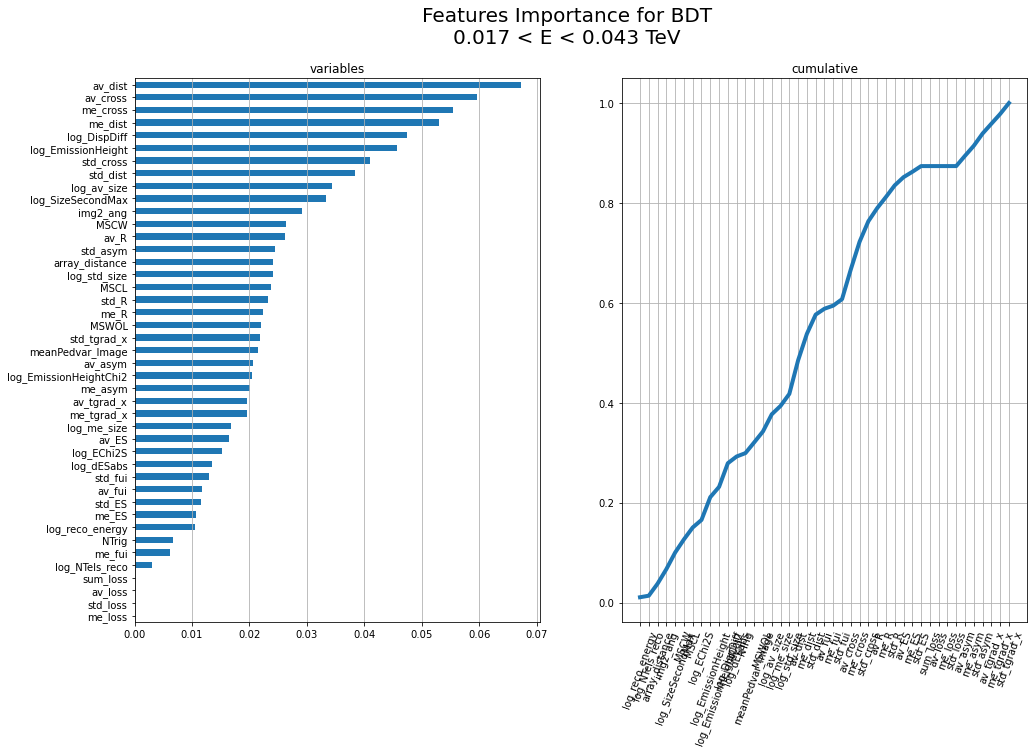

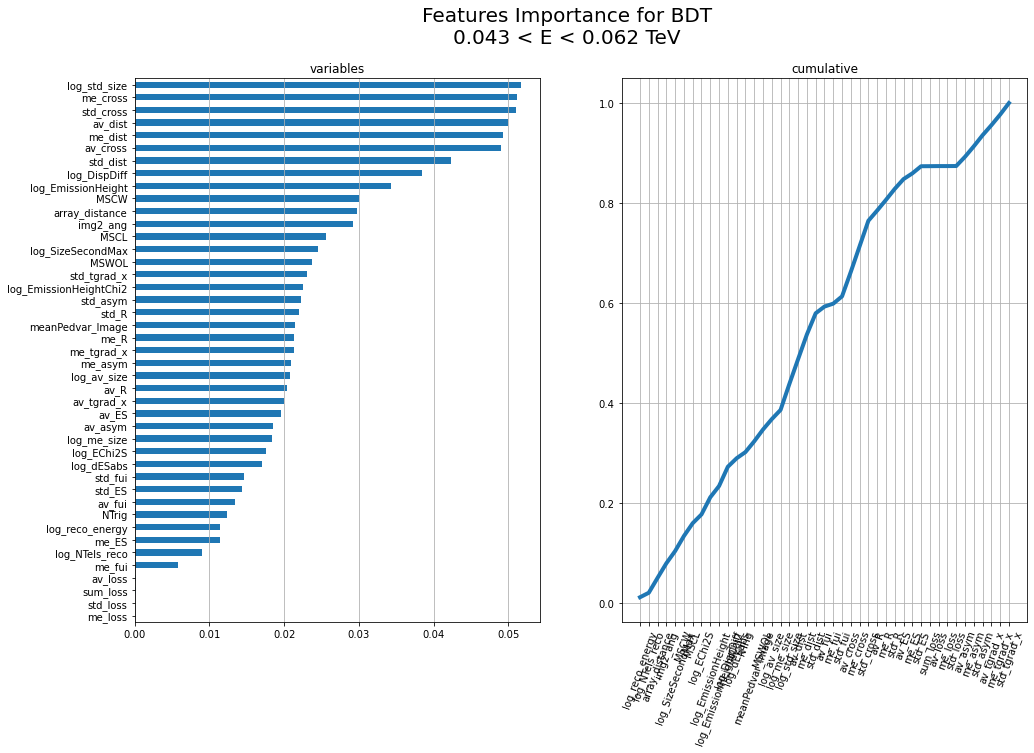

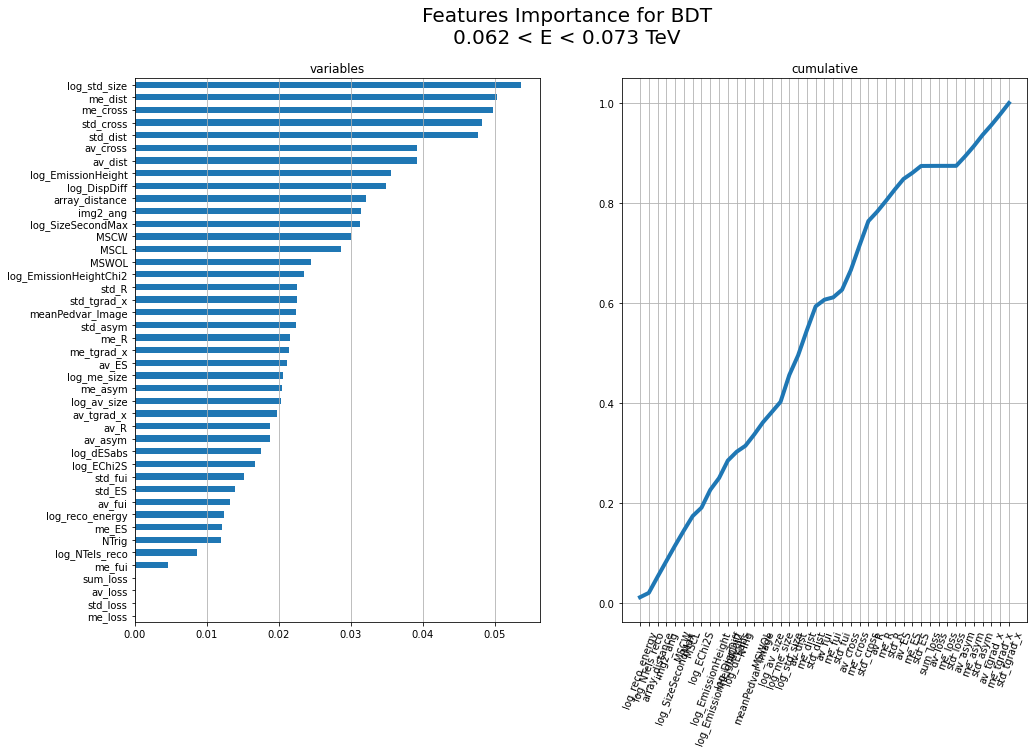

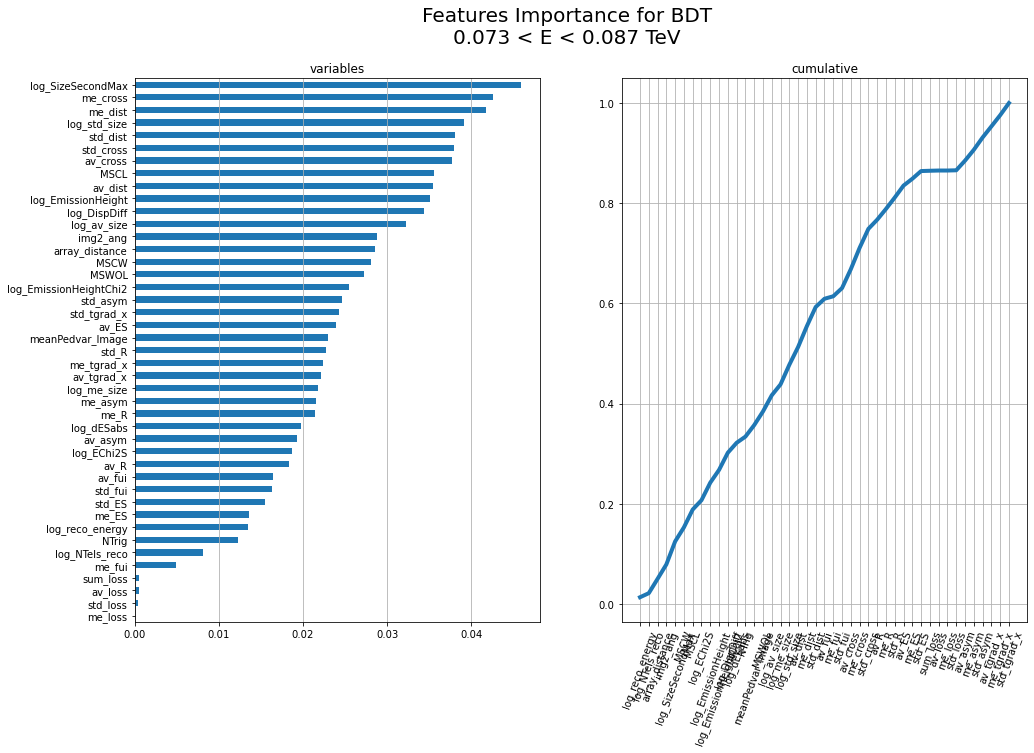

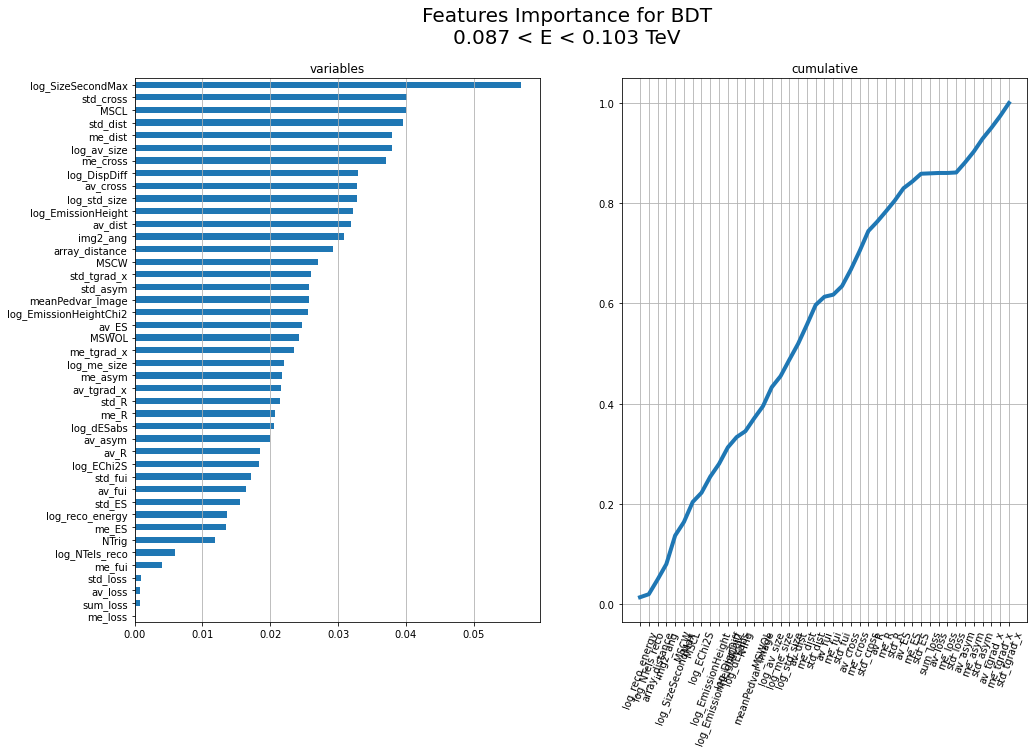

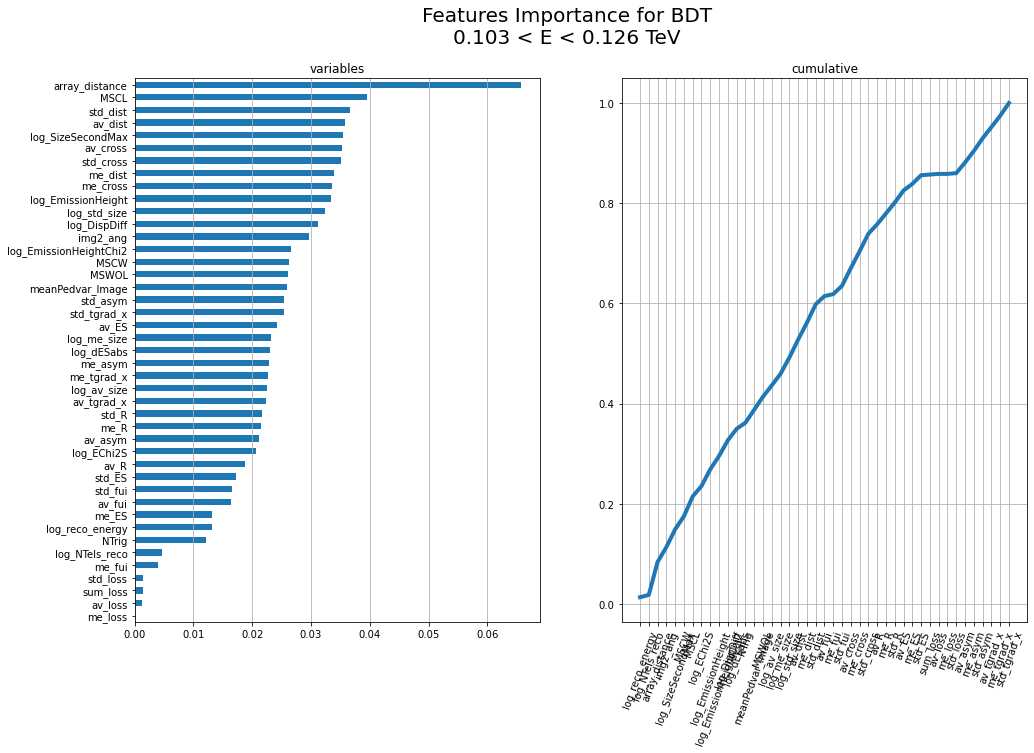

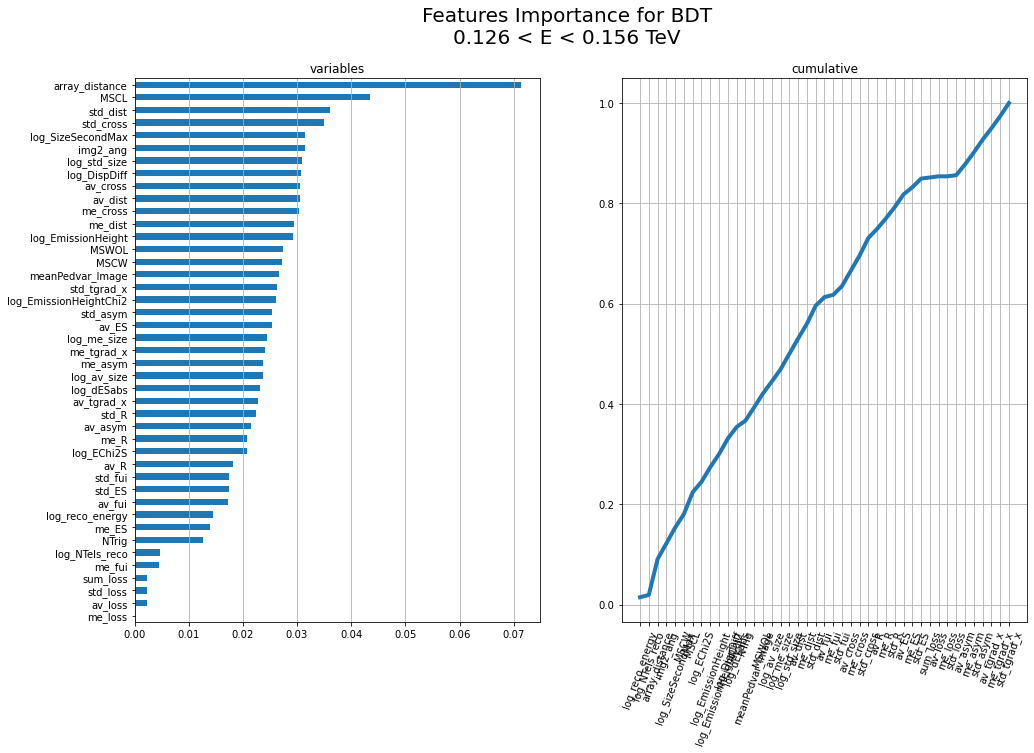

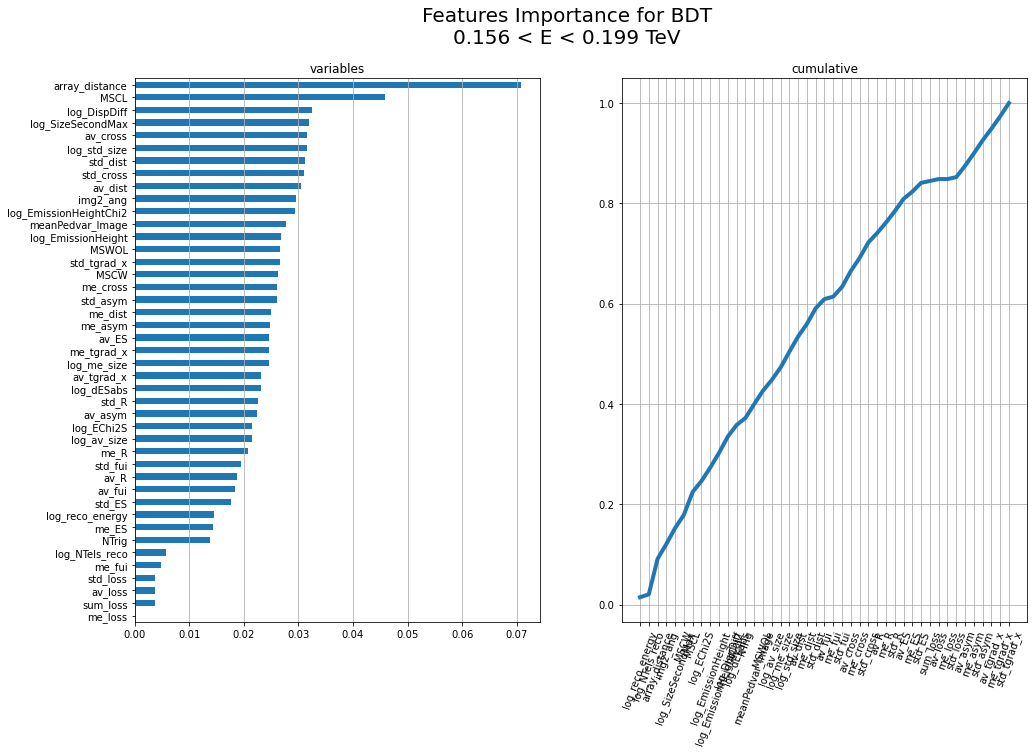

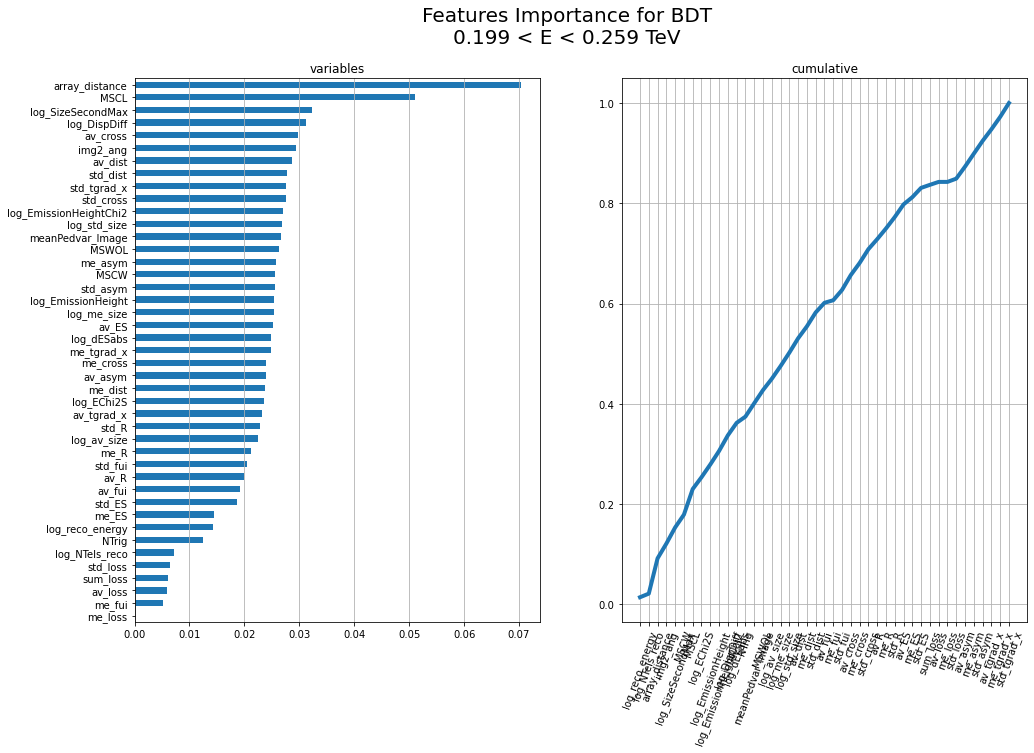

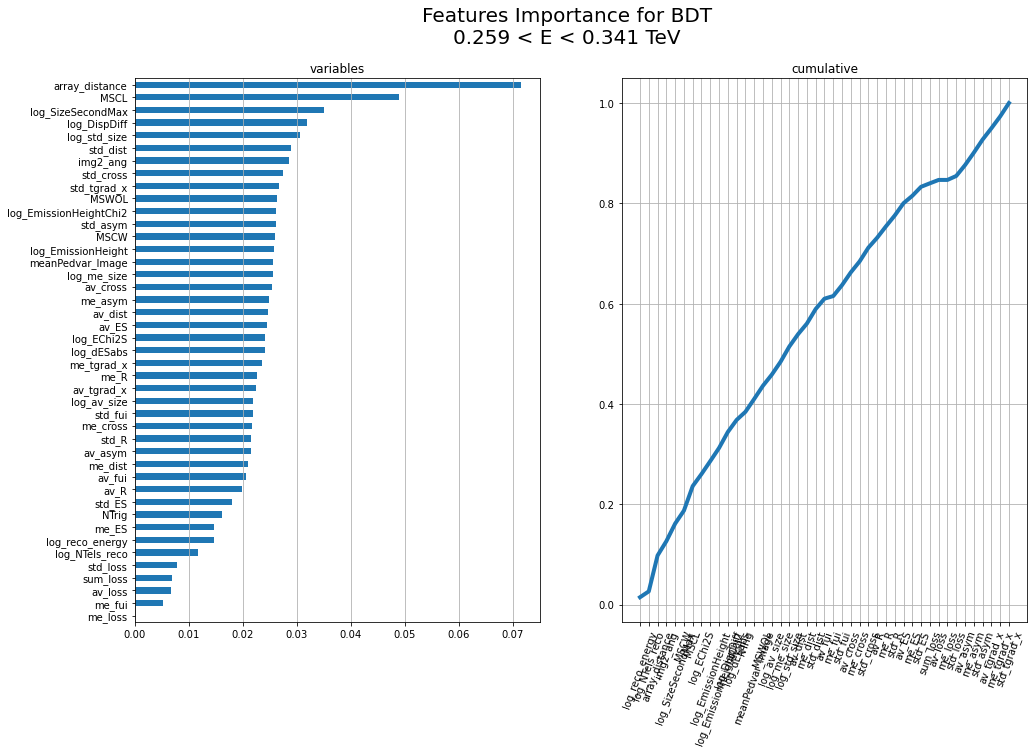

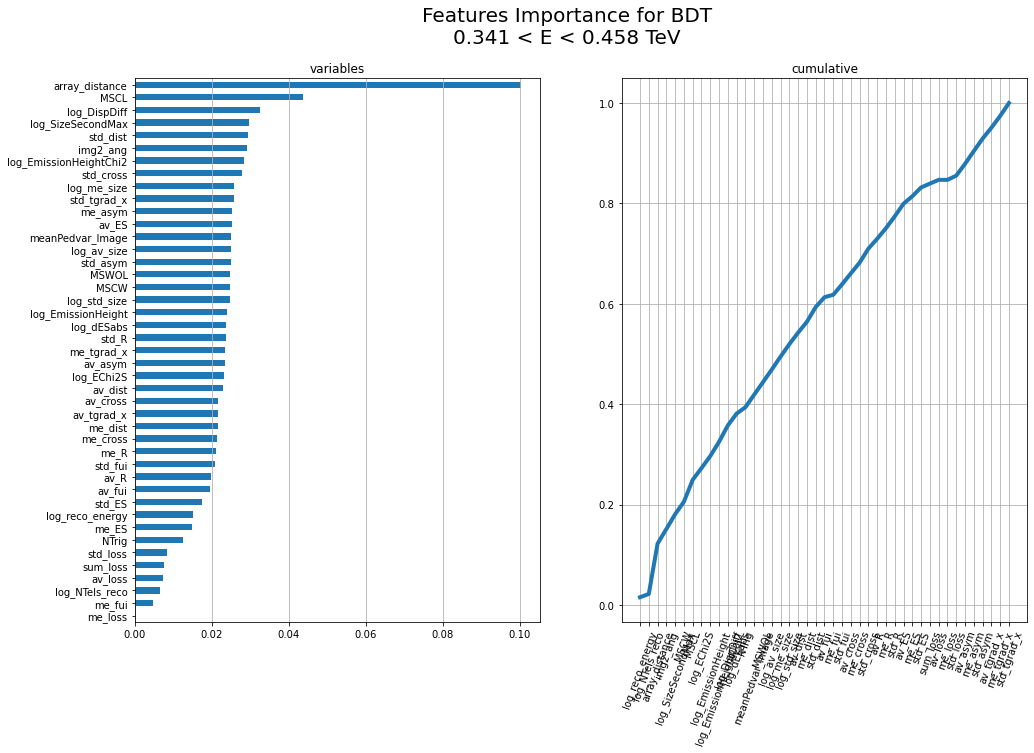

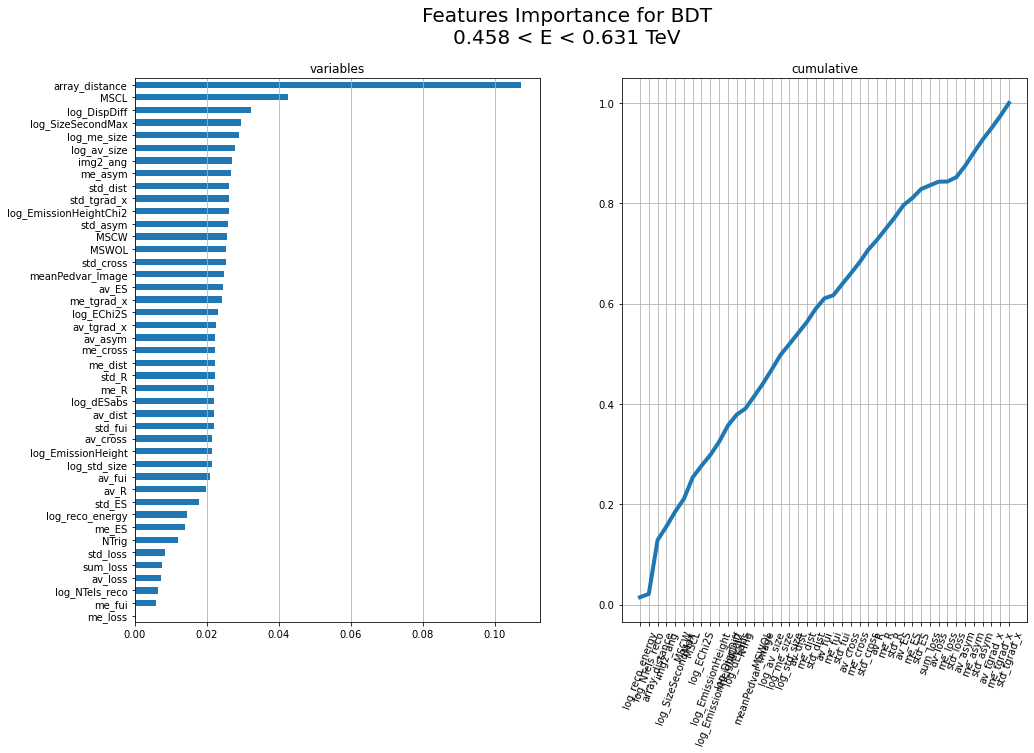

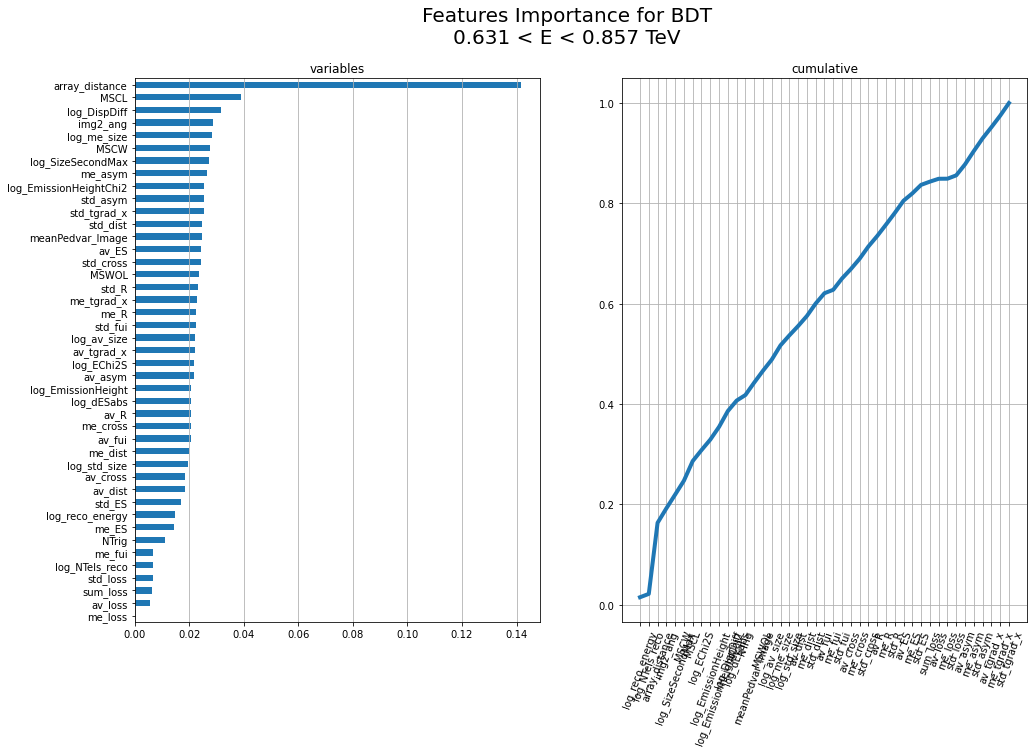

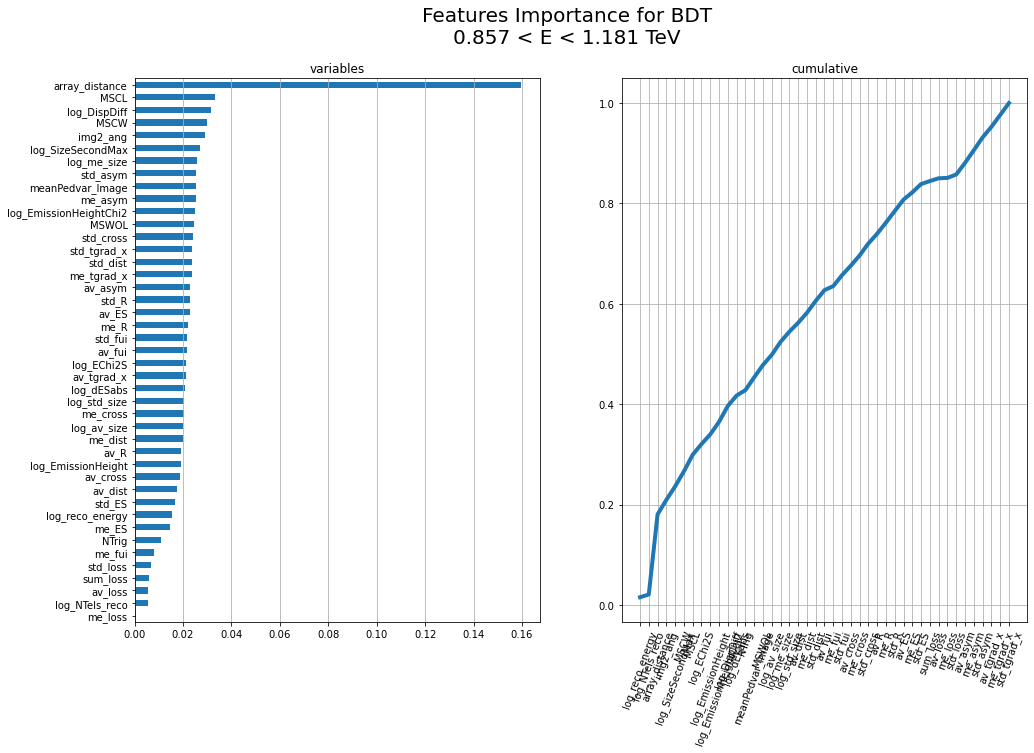

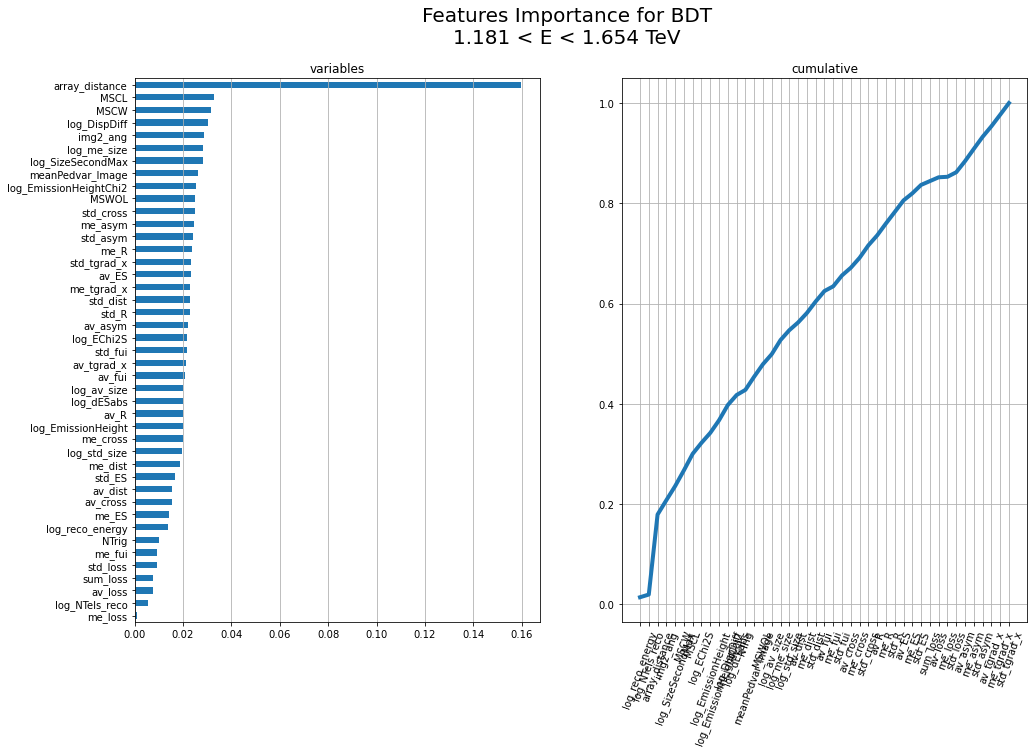

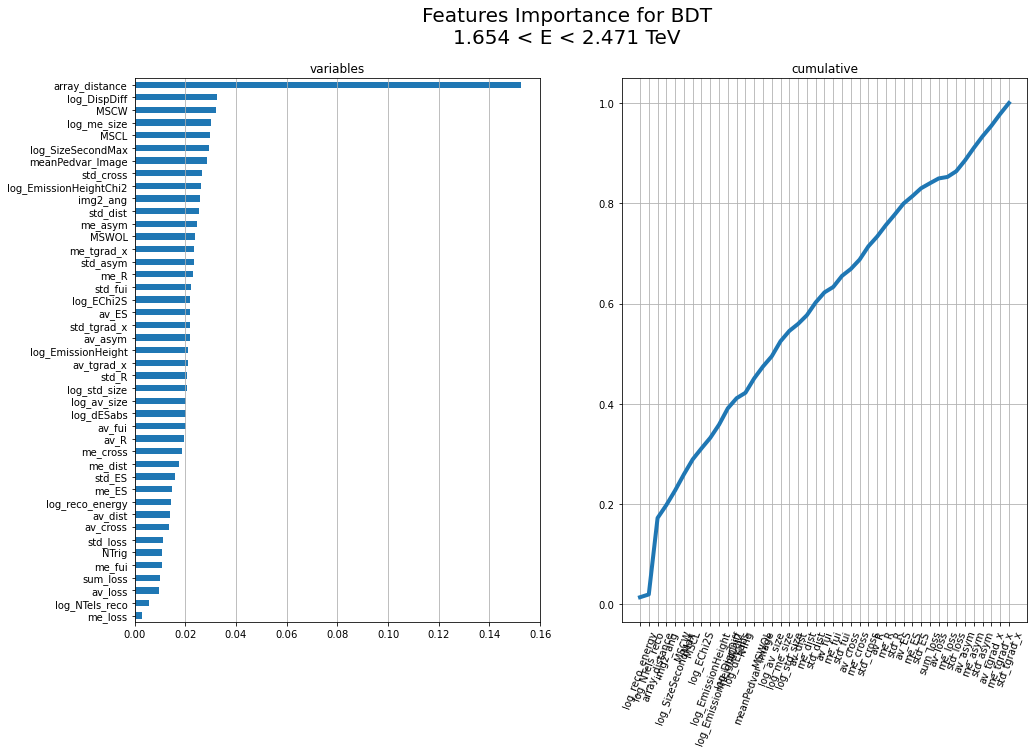

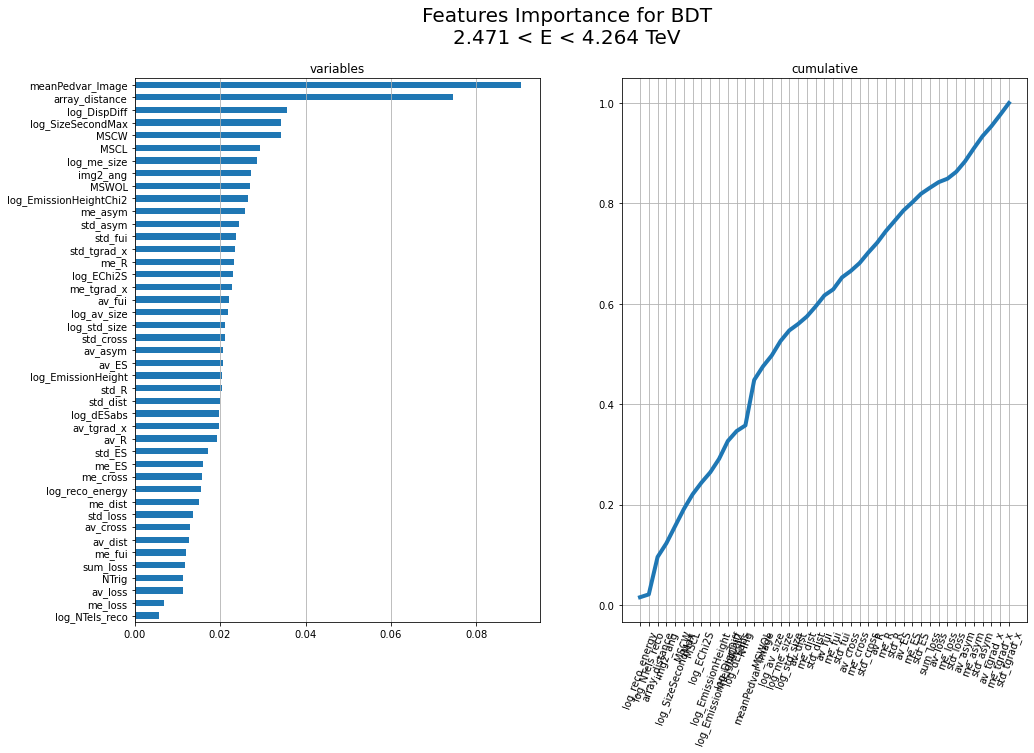

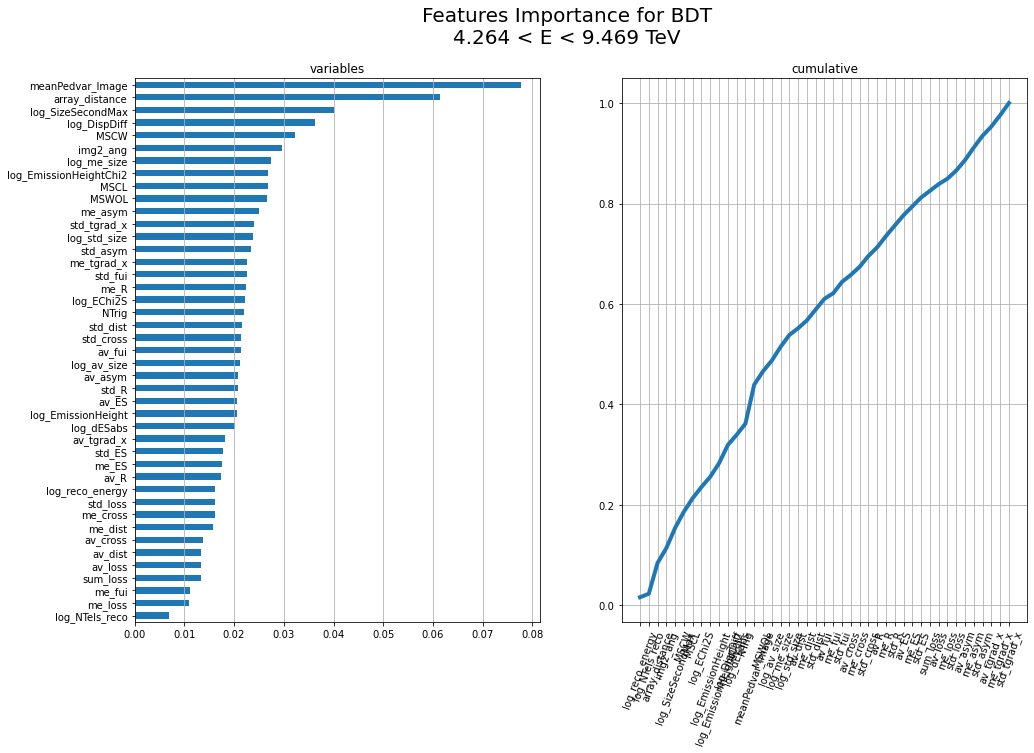

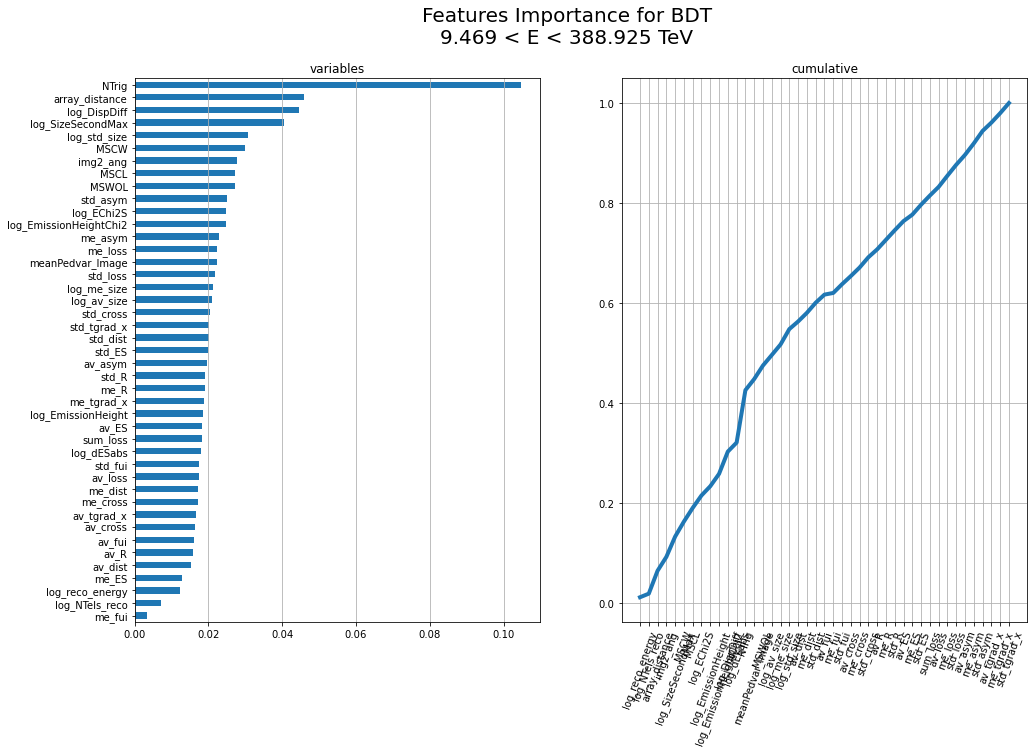

In [35]:
for this_e_range, this_model in trained_models['BDT_small'].items():
    plt = plot_variable_importance(this_model['model'], 'BDT', this_e_range, train_features)
    plt.show()